In [1]:
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print x_train.shape

(60000, 784)


In [10]:
autoenc = Sequential()
autoenc.add(Dense(32, activation="relu", input_shape=(784,)))
autoenc.add(Dense(784, activation="sigmoid"))

In [11]:
autoenc.compile(optimizer='adadelta', loss='mean_squared_error')

In [17]:
autoenc.fit(x_train, x_train,
                epochs=1,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s - loss: 0.0466 - val_loss: 0.0454
Epoch 2/5
60000/60000 [==============================] - 2s - loss: 0.0452 - val_loss: 0.0440
Epoch 3/5
60000/60000 [==============================] - 2s - loss: 0.0438 - val_loss: 0.0427
Epoch 4/5
60000/60000 [==============================] - 2s - loss: 0.0426 - val_loss: 0.0415
Epoch 5/5
60000/60000 [==============================] - 2s - loss: 0.0414 - val_loss: 0.0403


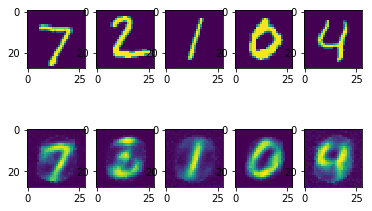

In [18]:
n=5
for k in range(n):
    ax = plt.subplot(2, n, k+1)
    plt.imshow(x_test[k:k+1,:].reshape((28,28)))
    ax = plt.subplot(2, n, k+1 + n)
    reconstruction = autoenc.predict(x_test[k:k+1,:])
    reconstruction.resize((28,28))
    plt.imshow(reconstruction)

### Exercise 1 - Deep Autoencoder
Build and train a deep autoencoder network. If possible, try to make your middle layer (embedding) just two dimensional, so that we can visualize the images compressed into a 2D space. 

Use the code below to extract the embedded representation for any image. For a set of test images, make a 2D scatter plot of the embedding representation and then color by the image class. Do you see any separation between the different MNIST numbers? 

In [31]:
from keras import backend as K
def extract_layer_output(model, layer_num):
    return K.function([model.input] + [K.learning_phase()], [model.layers[layer_num].output])

In [120]:
embedding_layer = extract_layer_output(autoenc, 2) # you'll need to edit this

In [121]:
embeddings = embedding_layer([x_test[1:1000,]])[0]
plt.scatter(embeddings[:,0], embeddings[:,1], c=y_test[1:1000])

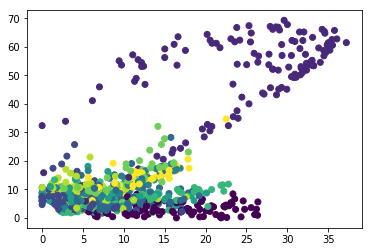

### Exercise 2 - Airfoil

Build and train an autoencoder on the UCI Airfoil dataset (https://archive.ics.uci.edu/ml/datasets/airfoil+self-noise) 

*  Download the data and load it into your python session (either with Numpy or Pandas). You may have to do some data transformations to get things into the proper arrays that Keras expects.

* Do some quick exploratory data analsis. What variables are in this dataset? For our purposes, we will *not* consider the "Sound Pressure" variable as a target. Instead, we will proceed with all the varialbes and consider only unsupervised methods. Make a few scatterplots (or scatterplot matrix) to see how the variables relate to each other.

 This dataset is derived from NASA wind tunnel experiments. Thus, the relationships between these variables are probably described by some rather simple physics equations. It might be the case that even though these data are measured in several dimensions, their variability might span only a low-dimensional manifold. We'll use an autocoder to test this hypothesis and see if we can capture this manifold. 
 
 
* Build and train an autoencoder. Explore which activation functions seems to be most helpful toward getting the smallest loss. Explore which architectures seem to be more successful than others.

* (Optional) If time permits, explore some visualization techniques of your embeddings, as described in Exercise 1.